In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [8]:
df= pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv")

#convert date field from string to datetime
#df['date'] = pd.to_datetime(df['date'])

In [9]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
df=df[0:300]

In [248]:
X = (df['date'])
y = (df['unit_sales'])
k=int(len(df) * 0.4) 
X_train = X[X.index <k]
y_train = y[y.index <k]              
    
X_test = X[X.index >= k]    
y_test = y[y.index >=k]


In [187]:
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

In [244]:
labels = y_train#[:, None]
features = X_train[:, None]

In [189]:
features.shape

(57, 1)

In [190]:
labels.shape

(57,)

In [191]:
rgr=RF_Model.fit(features,labels)

In [192]:
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [193]:
df['predicted_price']=RF_predict.index

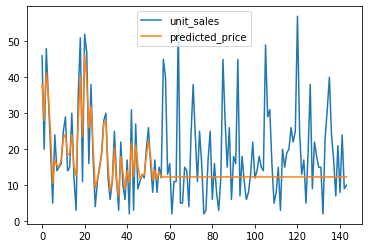

In [194]:
df[['unit_sales','predicted_price']].plot()



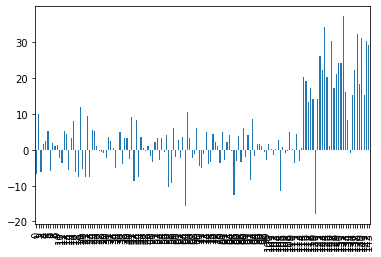

In [94]:
df['diff']=df.predicted_price - df.unit_sales
df['diff'].plot(kind='bar')

In [99]:
RSquared = r2_score(y_test[:, None], y_train_predict.reset_index().values)

NameError: name 'y_train_predict' is not defined

In [96]:
RSquared

-2.8788964250881532

In [195]:
X_test_predict

""
predicted_price
12.29
12.29
12.29
12.29
12.29
...
12.29
12.29
12.29


In [233]:
from sklearn.model_selection import train_test_split
predictors=df.drop(['date','unit_sales'],axis=1)
target=df['unit_sales']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.2,random_state=7)

In [235]:
predictors

""
0
1
2
3
4
...
139
140
141
142


In [237]:
model = RandomForestRegressor(oob_score = True,n_jobs =3,random_state =7,max_features = "auto", min_samples_leaf =4)

In [246]:
model.fit(features,labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=3, oob_score=True,
                      random_state=7, verbose=0, warm_start=False)

In [252]:
pred=model.predict(X_test[:, None])

In [253]:
pred

array([13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82457423,
       13.82457423, 13.82457423, 13.82457423, 13.82457423, 13.82

In [209]:
r2_score(pred,y_cv)

0.996615797880715

In [63]:
k = int(len(df) * 0.8)
train = df[:k]  
test= df[k:]
#test["date"]  = test["date"].astype(int)


In [64]:
train["date"] = train["date"].apply(lambda x: x.replace("-",""))
train["date"]  = train["date"].astype(int)
train["unit_sales"]  = train["unit_sales"].astype(int)
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,unit_sales
0,20113,27
1,30113,3
2,40113,14
3,50113,16
4,60113,8


In [65]:
test["date"] = test["date"].apply(lambda x: x.replace("-",""))
test["unit_sales"]  = test["unit_sales"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
x = train[['date','unit_sales']]
y1 = train[['unit_sales']]
x_test = test[['date','unit_sales']]


In [113]:
x_test.tail()

,date,unit_sales
295,241013,13
296,251013,15
297,261013,9
298,271013,12
299,281013,11


In [114]:
from sklearn.ensemble import RandomForestClassifier
Tree_model = RandomForestClassifier(max_depth=200, random_state=0)

In [115]:
Tree_model.fit(x,y1)
pred1 = Tree_model.predict(x_test)
pred1 = pd.DataFrame(pred1)
pred1.columns = ["ConfirmedCases_prediction"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [116]:
pred1

,ConfirmedCases_prediction
0,14
1,14
2,3
3,12
4,15
5,16
6,8
7,14
8,15
9,7


In [117]:
r2_score(pred1,test['unit_sales'])

0.7726827356456986

In [118]:
test['unit_sales']

240    15
241    16
242     6
243    12
244    15
245    16
246     8
247    14
248    15
249     7
250    14
251    14
252    21
253    12
254    11
255    14
256     7
257    23
258     9
259    10
260    14
261    20
262    20
263     4
264    13
265    11
266    15
267    11
268    16
269    14
270     9
271    28
272    13
273    18
274    11
275    13
276    10
277     6
278    17
279    13
280     8
281    10
282    22
283     3
284     3
285    14
286    14
287    16
288    11
289    17
290    13
291     8
292    12
293    12
294    20
295    13
296    15
297     9
298    12
299    11
Name: unit_sales, dtype: int32

In [33]:
from sklearn.metrics import mean_squared_error

In [120]:
np.sqrt(mean_squared_error(pred1,test['unit_sales']))

1.96638416050035

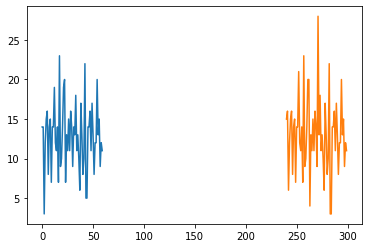

In [121]:
plt.plot(pred1)
plt.plot(test['unit_sales'])

In [37]:
forecast1=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/ML_FORECAST.csv")

In [314]:

error = pd.DataFrame(columns=['File_name','RMSE_ERROR_CNN','RMSE_ERROR_LSTM','RMSE_ERROR_CNN+LSTM','RMSE_ERROR_RANDOM_FOREST','R_SCORE','MSE','MAPE'])




In [315]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [316]:
dff=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/CNN+LSTM_forecast_error.csv")

In [323]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1']
m=0
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
        if  any(dff.File_name ==""+csv_file)==True:
       #if len(df.index)>=100:
            select_indices=list(np.where(dff["File_name"] == ''+csv_file)[0])
            print(select_indices)
            df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1/"+csv_file)
            df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
            k = int(len(df) * 0.8)
            train = df[:k]  
            test= df[k:]
            train["date"] = train["date"].apply(lambda x: x.replace("-",""))
            train["date"]  = train["date"].astype(int)
            train["unit_sales"]  = train["unit_sales"].astype(int)
            test["date"] = test["date"].apply(lambda x: x.replace("-",""))
            test["unit_sales"]  = test["unit_sales"].astype(int)
            x = train[['date','unit_sales']]
            y1 = train[['unit_sales']]
            x_test = test[['date','unit_sales']]
            Tree_model.fit(x,y1)
            pred1 = Tree_model.predict(x_test)
            pred1 = pd.DataFrame(pred1)
            error.loc[m, ['File_name']]=csv_file
            rmse =  np.sqrt(mean_squared_error(pred1,test['unit_sales']))
            error.loc[m, ['RMSE_ERROR_RANDOM_FOREST']]=rmse
            error.loc[m, ['R_SCORE']]=r2_score(pred1,test['unit_sales'])
            if len(select_indices)==1:
                b=dff.iloc[select_indices[0]]['RMSE_ERROR_LSTM']
                d=dff.iloc[select_indices[0]]['RMSE_ERROR_CNN']
                c=dff.iloc[select_indices[0]]['RMSE_ERROR_CNN+LSTM']
                error.loc[m, ['RMSE_ERROR_LSTM']]=b
                error.loc[m, ['RMSE_ERROR_CNN']]=d
                error.loc[m, ['RMSE_ERROR_CNN+LSTM']]=c
            error.loc[m, ['MSE']]=mean_squared_error(pred1,test['unit_sales'])
            error.loc[m, ['MAPE']]=mean_absolute_percentage_error(pred1,test['unit_sales'])
            m=m+1
            print(m)

[0]
1
[1]
2
[2]
3
[3]
4
[4]
5
[5]
6
[6]
7
[7]
8
[8]
9
[9]
10
[10]
11
[11]
12
[12]
13
[13]
14
[14]
15
[15]
16
[16]
17
[17]
18
[18]
19
[19]
20
[20]
21
[21]
22
[22]
23
[23]
24
[24]
25
[25]
26
[26]
27
[27]
28
[28]
29
[29]
30
[30]
31
[31]
32
[32]
33
[33]
34
[34]
35
[35]
36
[36]
37
[37]
38
[38]
39
[39]
40
[40]
41
[41]
42
[42]
43
[43]
44
[44]
45
[45]
46
[46]
47
[47]
48
[48]
49
[49]
50
[50]
51
[51]
52
[52]
53
[53]
54
[54]
55
[55]
56
[56]
57
[57]
58
[58]
59
[59]
60
[60]
61
[61]
62
[62]
63
[63]
64
[64]
65
[65]
66
[66]
67
[67]
68
[68]
69
[69]
70
[70]
71
[71]
72
[72]
73
[73]
74
[74]
75
[75]
76
[76]
77
[77]
78
[78]
79
[79]
80
[80]
81
[81]
82
[82]
83
[83]
84
[84]
85
[85]
86
[86]
87
[87]
88
[88]
89
[89]
90
[90]
91
[91]
92
[92]
93
[93]
94
[94]
95
[95]
96
[96]
97
[97]
98
[98]
99
[99]
100


In [339]:
error.head(100)

,File_name,RMSE_ERROR_CNN,RMSE_ERROR_LSTM,RMSE_ERROR_CNN+LSTM,RMSE_ERROR_RANDOM_FOREST,R_SCORE,MSE,MAPE
0,S_1__I_1001305.csv,1.35458,1.10799,1.28191,0,1,0,61.0577
1,S_1__I_1009998.csv,1.47389,1.35859,0.874792,0.3849,0.857143,0.148148,70.4847
2,S_1__I_1010752.csv,0.967724,1.00519,1.00439,0,1,0,51.5117
3,S_1__I_1018617.csv,1.0624,1.35548,1.42294,0,1,0,65.92
4,S_1__I_1040170.csv,1.32738,1.19962,0.95653,0,1,0,62.1302
...,...,...,...,...,...,...,...,...
95,S_1__I_890825.csv,1.6139,1.2508,1.16613,0.188982,0.971193,0.0357143,70.0319
96,S_1__I_911871.csv,1.8289,1.40379,1.19664,0.57735,0.602941,0.333333,66.8038
97,S_1__I_939662.csv,1.23639,0.870094,0.914508,0,1,0,53.6862
98,S_1__I_949297.csv,1.17311,0.872937,1.07956,0,1,0,54.7164
